In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb


In [2]:
def isIntersection(b1,b2):
    return not(b2[0] > b1[2] or b2[2] < b1[0] or b2[1] > b1[3] or b2[3] < b1[1])

# read original image

(26, 170, 3)
resized shape: (161, 1054, 3)


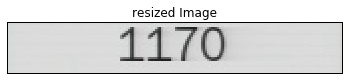

In [3]:
img_ori=cv2.imread("/home/fengsibo/my_project/OCR/image_segmentation/capture/catch1498652249208.jpg",1)
print img_ori.shape
#cv2.imshow("img_ori",img_ori)
#cv2.waitKey(0)
MAX_AREA=img_ori.shape[0]*img_ori.shape[1]
scale=1.0
imgH=img_ori.shape[0]
imgH_ref=img_ori.shape[0]
#print imgH
while (imgH<160):
    scale+=0.1
    imgH=scale*imgH_ref
#INTER_LINEAR
#print scale
dst=cv2.resize(img_ori,(0,0),fx= scale,fy= scale, interpolation=cv2.INTER_NEAREST)
print "resized shape:",dst.shape
plt.imshow(dst,cmap = 'gray')
plt.title('resized Image'), plt.xticks([]), plt.yticks([])
plt.show()

# convert color image to gray

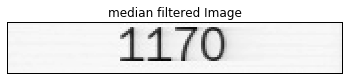

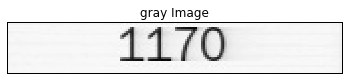

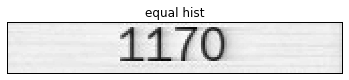

In [4]:
img_gray=cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)
#cv2.imshow("img_gray",img_gray)
#cv2.waitKey(0)

#img_median1=cv2.medianBlur(img_equ,3)
img_median=cv2.medianBlur(img_gray,3)

#img_equ = cv2.equalizeHist(img_median)
# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img_equ = clahe.apply(img_median)


plt.imshow(img_median,cmap = 'gray')
plt.title('median filtered Image'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(img_gray,cmap = 'gray')
plt.title('gray Image'), plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(img_equ,cmap = 'gray')
plt.title('equal hist'), plt.xticks([]), plt.yticks([])
plt.show()

# compute image edges

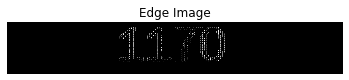

In [5]:
image_edges=cv2.Canny(img_median,100,200,3)#100,200,3
#cv2.imshow("img_edges",image_edges)
#cv2.waitKey(0)
plt.imshow(image_edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

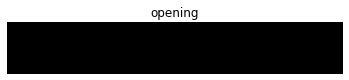

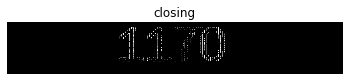

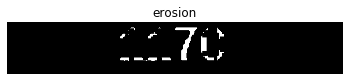

In [6]:
kernel=cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))

opening = cv2.morphologyEx(image_edges, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(image_edges, cv2.MORPH_CLOSE, kernel)

dilation = cv2.dilate(image_edges,kernel,iterations = 3)
erosion = cv2.erode(dilation,kernel,iterations = 5)

plt.imshow(opening,cmap = 'gray')
plt.title('opening'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(closing,cmap = 'gray')
plt.title('closing'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(erosion,cmap = 'gray')
plt.title('erosion'), plt.xticks([]), plt.yticks([])
plt.show()

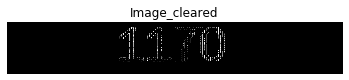

In [7]:
cleared = clear_border(closing)
plt.imshow(cleared,cmap = 'gray')
plt.title('Image_cleared'), plt.xticks([]), plt.yticks([])
plt.show()

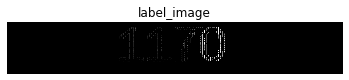

In [8]:
label_image = label(cleared)
plt.imshow(label_image,cmap = 'gray')
plt.title('label_image'), plt.xticks([]), plt.yticks([])
plt.show()

In [9]:
image_label_overlay = label2rgb(label_image, image=dst)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)
all_regions=regionprops(label_image)
#print "type:",type(candidate_regions)
candidate_regions=[]
valid_regions_tmp=[]
valid_regions=[]

for region in all_regions:
    # take regions with large enough areas
    if region.area >= MAX_AREA/18:
        candidate_regions.append(region.bbox)
print len(candidate_regions)

isValid=0

for i in range(len(candidate_regions)):
    rr=candidate_regions[i]# reference box
    #print type(rr)
    #print rr
    print i
    for j in range(len(candidate_regions)):
        if i==j:
            continue
        cr=candidate_regions[j]#the box to be compared with
        if cr[0]<rr[0] and cr[1]<rr[1] and cr[2]>rr[2] and cr[3]>rr[3]:
            isValid=0
            break
        else:
            isValid=1
    if isValid:
        valid_regions.append(rr)
        
'''   

isInter=0# to see if it is intersect
r_r=(0,0,0,0)
c_r=(0,0,0,0)
new_r=(0,0,0,0)
for i in range(len(valid_regions_tmp)):
    r_r=valid_regions_tmp[i]
    for j in range(len(valid_regions_tmp)):
        if i==j:
            continue
        c_r=valid_regions_tmp[j]#the box to be compared with
        isInter=isIntersection(rr,cr)
        if isInter:
            #valid_regions_tmp.remove(r_r)
            #valid_regions_tmp.remove(c_r)
            break
    if isInter:
        alist=[r_r,c_r]
        zip(*alist)
        max_l=map(max, zip(*alist))
        min_l=map(min, zip(*alist))
        new_r=(min_l[0],min_l[1],max_l[2],max_l[3])
        #valid_regions_tmp.append(new_r)
        valid_regions.append(new_r)
    else:
        valid_regions.append(r_r)
             
        #print "haha"
print len(valid_regions)
print valid_regions
'''   

3
0
1
2


'   \n\nisInter=0# to see if it is intersect\nr_r=(0,0,0,0)\nc_r=(0,0,0,0)\nnew_r=(0,0,0,0)\nfor i in range(len(valid_regions_tmp)):\n    r_r=valid_regions_tmp[i]\n    for j in range(len(valid_regions_tmp)):\n        if i==j:\n            continue\n        c_r=valid_regions_tmp[j]#the box to be compared with\n        isInter=isIntersection(rr,cr)\n        if isInter:\n            #valid_regions_tmp.remove(r_r)\n            #valid_regions_tmp.remove(c_r)\n            break\n    if isInter:\n        alist=[r_r,c_r]\n        zip(*alist)\n        max_l=map(max, zip(*alist))\n        min_l=map(min, zip(*alist))\n        new_r=(min_l[0],min_l[1],max_l[2],max_l[3])\n        #valid_regions_tmp.append(new_r)\n        valid_regions.append(new_r)\n    else:\n        valid_regions.append(r_r)\n             \n        #print "haha"\nprint len(valid_regions)\nprint valid_regions\n'

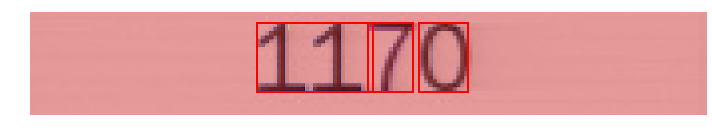

In [10]:
for region in valid_regions:
    # take regions with large enough areas
    minr, minc, maxr, maxc = region
    #print region.bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                            fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)
        #print type(region.bbox)
ax.set_axis_off()
plt.tight_layout()
plt.show()